# GridSearchCV

#최적의 hyperparameter 의 조합을 tunning 하는 과정

In [4]:
import numpy as np
def make_data(N, err=1.0, rseed=1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y
X, y = make_data(40)
print(type(X))

 

 

 
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV #parameter tuning
from sklearn.preprocessing import PolynomialFeatures# 다차원특성축사
import numpy as np
# 파이프라인 리턴
def PolynomialRegression(degree=2, **kwargs):# dict 변동 매개변수
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

# 0~20 까지의 범위로
# polynomialfeatures__degree 다차원에서 -2차원으로 포물선 곡선을 만듦
# intercept 가 있을지 말지 / normalize 가 있을지 말지로 조합

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]} 

<class 'numpy.ndarray'>


In [5]:
#116페이지
#crss validation 으로  cv=7 번 교차검증으로
# 파이프라인 PolynomialFeatures(degree),LinearRegression(**kwargs) 수행
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [6]:
grid.fit(X, y);

C:\Users\ICT01_02\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [7]:
grid.best_params_ # 비선형회귀 4차일경우 가장 좋은 결과
# 최상의 하이퍼파라미터의 조합을 만듦

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

In [9]:
grid.best_estimator_ #best_parameter 로 만득 최적의 방정식조건

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=4, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
                                  normalize=True))],
         verbose=False)

In [11]:
grid.best_score_ #최적의 예측값

0.8956938691106144

In [14]:
 np.linspace(-0.1, 1.1, 500)

array([-1.00000000e-01, -9.75951904e-02, -9.51903808e-02, -9.27855711e-02,
       -9.03807615e-02, -8.79759519e-02, -8.55711423e-02, -8.31663327e-02,
       -8.07615230e-02, -7.83567134e-02, -7.59519038e-02, -7.35470942e-02,
       -7.11422846e-02, -6.87374749e-02, -6.63326653e-02, -6.39278557e-02,
       -6.15230461e-02, -5.91182365e-02, -5.67134269e-02, -5.43086172e-02,
       -5.19038076e-02, -4.94989980e-02, -4.70941884e-02, -4.46893788e-02,
       -4.22845691e-02, -3.98797595e-02, -3.74749499e-02, -3.50701403e-02,
       -3.26653307e-02, -3.02605210e-02, -2.78557114e-02, -2.54509018e-02,
       -2.30460922e-02, -2.06412826e-02, -1.82364729e-02, -1.58316633e-02,
       -1.34268537e-02, -1.10220441e-02, -8.61723447e-03, -6.21242485e-03,
       -3.80761523e-03, -1.40280561e-03,  1.00200401e-03,  3.40681363e-03,
        5.81162325e-03,  8.21643287e-03,  1.06212425e-02,  1.30260521e-02,
        1.54308617e-02,  1.78356713e-02,  2.02404810e-02,  2.26452906e-02,
        2.50501002e-02,  

In [15]:
np.linspace(-0.1, 1.1, 500)[:, None] # 열이 없다는 의미

array([[-1.00000000e-01],
       [-9.75951904e-02],
       [-9.51903808e-02],
       [-9.27855711e-02],
       [-9.03807615e-02],
       [-8.79759519e-02],
       [-8.55711423e-02],
       [-8.31663327e-02],
       [-8.07615230e-02],
       [-7.83567134e-02],
       [-7.59519038e-02],
       [-7.35470942e-02],
       [-7.11422846e-02],
       [-6.87374749e-02],
       [-6.63326653e-02],
       [-6.39278557e-02],
       [-6.15230461e-02],
       [-5.91182365e-02],
       [-5.67134269e-02],
       [-5.43086172e-02],
       [-5.19038076e-02],
       [-4.94989980e-02],
       [-4.70941884e-02],
       [-4.46893788e-02],
       [-4.22845691e-02],
       [-3.98797595e-02],
       [-3.74749499e-02],
       [-3.50701403e-02],
       [-3.26653307e-02],
       [-3.02605210e-02],
       [-2.78557114e-02],
       [-2.54509018e-02],
       [-2.30460922e-02],
       [-2.06412826e-02],
       [-1.82364729e-02],
       [-1.58316633e-02],
       [-1.34268537e-02],
       [-1.10220441e-02],
       [-8.6

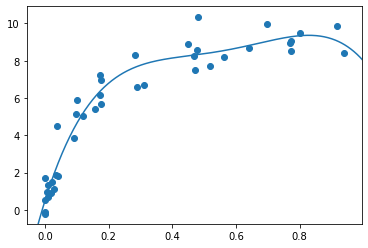

In [13]:
import matplotlib.pyplot as plt
model = grid.best_estimator_ 
# 위에서 최적의 하이퍼파라미터 값을 넣은 모델

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

#ravel = flat 하게 평평하게 데이터를 만들어라 => 다차원이 1차원으로
plt.scatter(X.ravel(), y) # y의 차수와 같은 차수로 만들기 위해서
                          # X.ravel() 을 통해서 다 1차원으로 나눠서 y값을 뽑음

lim = plt.axis()

y_test = model.fit(X,y).predict(X_test) 
# 최상의 모델에 fitting 해서 방정식 만들어서 predict
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

# 정규화 스케일 Z score

In [17]:
import numpy as np
import pandas as pd
dataset= [10,12,12,13,12,11,14,13,15,10,10,10,100,12,14,13,
          12,10,10,11,12,15,12,13,12,11,14,13,15,10,15,12,10,14,13,15,10]
outliers=[]

def detect_outlier(data_1): # 매개변수
    threshold=3
    mean_1 = np.mean(data_1) # 평균계산
    std_1 = np.std(data_1)   # 표준편차 계산

    for y in data_1:  # 데이터에서 하나씩 for문으로 이용
        z_score= (y-mean_1)/std_1 # z점수  => 정규화 scale
        
                         # 표준편차의 몇배수에 위치하는지 z점수로 확인
                         # 1배수 68% 2배수 95%, 3배수 99%
                
        if np.abs(z_score) > threshold: # 표준편차로 나눈 z점수가 > 3
            outliers.append(y)          # 이상치에 붙여넣어라.
            
    return outliers
outlier_datapoints = detect_outlier(dataset)
outlier_datapoints

[100]

[-3. -2. -1.  0.  1.  2.  3.  4.  5.  6.]


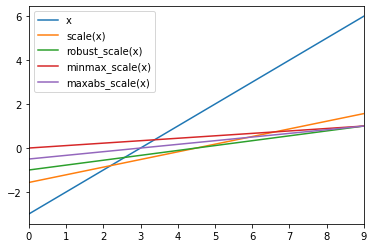

In [20]:
import pandas as pd
import numpy as np
# robust_scale 평균:  median(위치적 중위수) / IQR
# maxabs_scale : -1 ~1
# minmax : 0~1
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

print((np.arange(10, dtype=np.float) - 3))
x = (np.arange( 10, dtype=np.float) - 3).reshape(-1,1)

#print(x)
df = pd.DataFrame(np.hstack([x, scale(x), robust_scale(x),
                            minmax_scale(x), maxabs_scale(x)]),
                 columns=["x", "scale(x)", "robust_scale(x)", "minmax_scale(x)", "maxabs_scale(x)"])
df.plot()

<class 'sklearn.utils.Bunch'>
전처리전 평균 [5.84333333 3.05733333 3.758      1.19933333]
전처리전 std [0.82530129 0.43441097 1.75940407 0.75969263]
전처리후 평균 [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
전처리전 std [1. 1. 1. 1.]



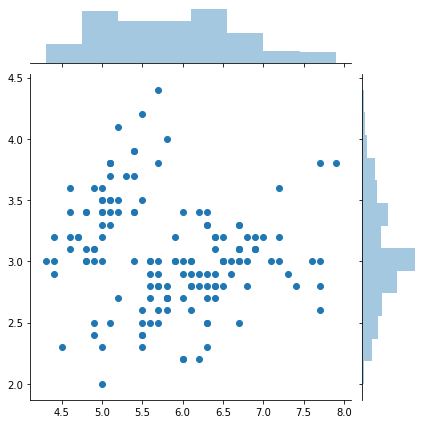

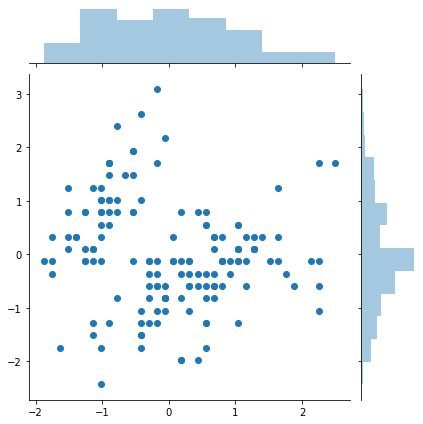

In [22]:

# 분포는 동일하지만 정규화 => 변수 기여도를 동일하게 하기 위해서 함
import seaborn as sns
from sklearn.datasets import load_iris
iris = load_iris()
print(type(iris))

data1= iris.data
data2= scale(iris.data) # scale() 함수에 데이터 넣기

print("전처리전 평균", np.mean(data1, axis=0))
print("전처리전 std", np.std(data1, axis=0))
print("전처리후 평균", np.mean(data2, axis=0))
print("전처리전 std", np.std(data2, axis=0))
print()

# joint() 합쳐서 보여주는 그래프 함수
sns.jointplot(data1[:,0], data1[:,1])
plt.show()
sns.jointplot(data2[:,0], data2[:,1])
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # 인스턴스
scaler.fit(data1) # 정규화분포기에 데이터 넣어서 fitting

data2 = scaler.transform(data1) # transformer 변환기 => 전처리
data1.std(),data2.std()

(1.9738430577598278, 1.0)

# 데이터 전처리 = OneHotEncoder

In [31]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X = np.array([[0],[1],[2]]) # 카테고리 3개
X

ohe.fit(X)
print(ohe.n_values_) # 
print(ohe.feature_indices_) # ?????
print(ohe.active_features_) # 
print()
print(" 카테고리",ohe.categories_)

print()
print(ohe.transform(X).toarray())

[3]
[0 3]
[0 1 2]

 카테고리 [array([0., 1., 2.])]

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


C:\Users\ICT01_02\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\ICT01_02\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:100: DeprecationWarning: The ``n_values_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\ICT01_02\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:100: DeprecationWarning: The ``feature_indices_`` attribute was deprecated in version 0.20 and will be 

In [34]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X1 = np.array([[0,0,4],[1,1,0],[0,2,1],[1,0,2],[1,1,3]]) # 카테고리 5개
X1

# 입력값 3자리 => 10자리가 됨
ohe.fit(X1)

print(ohe.transform(X1).toarray()) # 리스트로 보여줌

[[1. 0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 1. 0.]]


C:\Users\ICT01_02\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [35]:
print(ohe.n_values_) 
# 들어있는 데이터 첫열, 0,1 =2가지  / 2번째열 0,1,2 = 3가지 / 3번째열 = 5가지
# 위에 ndarray로 보면 2,3,5 총 10개의 행으로 이루어진 조합이 나옴
print(ohe.feature_indices_)
print(ohe.active_features_) 
print()
print(" 카테고리",ohe.categories_)

[2 3 5]
[ 0  2  5 10]
[0 1 2 3 4 5 6 7 8 9]

 카테고리 [array([0., 1.]), array([0., 1., 2.]), array([0., 1., 2., 3., 4.])]


C:\Users\ICT01_02\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:100: DeprecationWarning: The ``n_values_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\ICT01_02\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:100: DeprecationWarning: The ``feature_indices_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\ICT01_02\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:100: DeprecationWarning: The ``active_features_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)


# LabelEncoder

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit([1,2,2,6])
le.classes_ # 종류표를 만들어 놓고

array([1, 2, 6])

In [43]:
le.transform([1,1,2,6]) # => 1의 인덱스 위치: 0 
                        # => 2의 인덱스 위치: 1
                        # => 6의 인덱스 위치: 2

array([0, 0, 1, 2], dtype=int64)

In [45]:
le.inverse_transform([0,0,1,2]) # 인덱스위치로 찾아가는 함수

array([1, 1, 2, 6])

In [ ]:
# on

In [75]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X1 = [["서울"], ["서울"], ["대전"], ["부산"]] # 2차원 리스트안에 리스트 형태로
X1
ohe.fit_transform(X1).toarray()

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [46]:
le.fit(["서울", "서울", "대전", "부산"])
le.classes_

array(['대전', '부산', '서울'], dtype='<U2')

In [50]:
le.transform(["서울","서울","대전"])

array([2, 2, 0], dtype=int64)

In [51]:
list(le.inverse_transform([2,2,0]))

['서울', '서울', '대전']

In [54]:
from sklearn.feature_extraction import DictVectorizer
v=DictVectorizer(sparse=False)
D=[{'foo' : 1, 'bar' : 2}, {'foo' : 3, 'baz' : 1}]

X=v.fit_transform(D)
X

# 2.'bar' 0.'baz' 1.'foo'
# 0.'bar' 1.'baz' 3.'foo' # 알파벳 순으로

array([[2., 0., 1.],
       [0., 1., 3.]])

In [56]:
v.feature_names_

['bar', 'baz', 'foo']

In [57]:
v.inverse_transform(X)

[{'bar': 2.0, 'foo': 1.0}, {'baz': 1.0, 'foo': 3.0}]

In [69]:
# 결측치 처리
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
# 결측치 mean 넣기 / median / most_frequency
imp_mean.fit([[5,2,3],[4,np.nan,6],[10,5,9]])
            

X=[[np.nan,2,3],[4,np.nan,6],[10,np.nan,9]]
imp_mean.transform(X)

array([[ 6.33333333,  2.        ,  3.        ],
       [ 4.        ,  3.5       ,  6.        ],
       [10.        ,  3.5       ,  9.        ]])

In [77]:
from sklearn.preprocessing import PolynomialFeatures
X=np.arange(6).reshape(3,2)
X # 2개의 변수에 관측치 3개 => 배열 만들어서 넣으면 [] 한개로 봄

array([[0, 1],
       [2, 3],
       [4, 5]])

In [79]:

poly = PolynomialFeatures(2) # 다항식 계산 결과값을 속성값으로 추가
# [1, a, b, a^2, ab, b^2]   => 비선형회귀로 만들어줌

poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])